# Crop Yield Analysis
Building a relevant machine learning model to predict yield consdering factors:
* Rainfall
* Temperature
* Use of pesticides

Different datasets for `average rainfall`,`use of pesticides`,`temperature`,`yields` are used to study the problem.The data used is from worldbank.org

Crop yield prediction models are a critical tool in modern agriculture. They help improve productivity, enhance food security, and provide economic benefits. With the increasing challenges posed by climate change, population growth, and resource scarcity, these models will continue to play a vital role in ensuring the sustainability and efficiency of agricultural systems worldwide.









# Importing Libraries

In [342]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score


# Data

#### 1.Rainfall data preprocessing



In [345]:
# average rainfall data
rainfall=pd.read_csv('rainfall.csv')

In [346]:
# Checking number of columns,datatype and presence of null values
rainfall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6727 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0    Area                          6727 non-null   object
 1   Year                           6727 non-null   int64 
 2   average_rain_fall_mm_per_year  5953 non-null   object
dtypes: int64(1), object(2)
memory usage: 157.8+ KB


In [347]:
# average rainfall has null values and has datatype object which needs to be converted into number
rainfall.average_rain_fall_mm_per_year.unique()

array(['327', '1485', '89', nan, '1010', '1030', '591', '562', '534',
       '1110', '447', '..', '1292', '83', '2666', '1422', '618', '847',
       '1705', '1039', '2200', '1146', '1028', '416', '1761', '2722',
       '608', '748', '1274', '228', '1904', '1604', '537', '1342', '322',
       '1522', '645', '3240', '900', '1543', '1646', '2926', '1348',
       '1113', '1335', '498', '677', '703', '220', '2083', '1410', '2274',
       '51', '1784', '2156', '383', '626', '788', '848', '2592', '536',
       '867', '1831', '836', '1026', '700', '1187', '652', '2350', '1996',
       '1651', '1577', '2387', '1440', '1976', '589', '1940', '1083',
       '2702', '216', '1118', '435', '832', '2051', '1668', '111', '250',
       '630', '1054', '121', '533', '1834', '641', '661', '2391', '56',
       '656', '934', '619', '1513', '1181', '2875', '1972', '282', '560',
       '92', '2041', '758', '450', '241', '346', '1032', '2091', '285',
       '1500', '778', '1732', '2280', '151', '1150', '1414', 

In [348]:
# Converting object data type into int data type
rainfall['average_rain_fall_mm_per_year']=rainfall['average_rain_fall_mm_per_year'].fillna('0')
rainfall['average_rain_fall_mm_per_year']=rainfall['average_rain_fall_mm_per_year'].str.replace('..','0')
rainfall['average_rain_fall_mm_per_year']=rainfall['average_rain_fall_mm_per_year'].astype(int)

In [349]:
# calculating median and handling null values
median=rainfall['average_rain_fall_mm_per_year'].median()
rainfall['average_rain_fall_mm_per_year']=rainfall['average_rain_fall_mm_per_year'].replace(0,median)


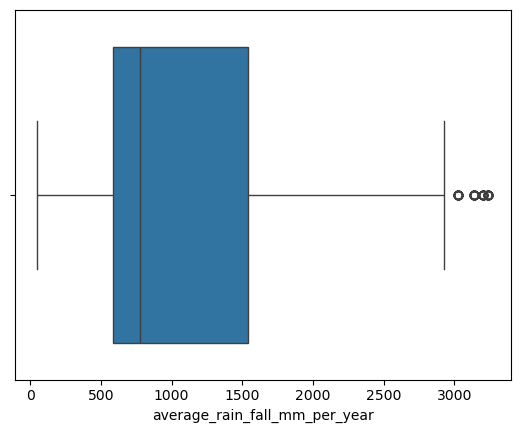

In [350]:
# checking for outliers
sns.boxplot(x=rainfall['average_rain_fall_mm_per_year'])
plt.show()

In [351]:
# finding lower and upper limit for outliers
q1=rainfall['average_rain_fall_mm_per_year'].quantile(0.25)
q3=rainfall['average_rain_fall_mm_per_year'].quantile(0.75)
IQR=q3-q1
lower_limit=q1-1.5*IQR
upper_limit=q3+1.5*IQR

print('Lower limit is :',lower_limit)
print('Upper limit is :',upper_limit)

Lower limit is : -842.0
Upper limit is : 2974.0


In [352]:
rainfall.loc[rainfall['average_rain_fall_mm_per_year']<lower_limit]

,Area,Year,average_rain_fall_mm_per_year


In [353]:
# Number of outliers are not excessive
# We will keep outliers in the data to consider extreme climate to get better understanding
rainfall.loc[rainfall['average_rain_fall_mm_per_year']>upper_limit]

,Area,Year,average_rain_fall_mm_per_year
1302,Colombia,1985,3240
1303,Colombia,1986,3240
1304,Colombia,1987,3240
1305,Colombia,1989,3240
1306,Colombia,1990,3240
...,...,...,...
5451,Solomon Islands,2013,3028
5452,Solomon Islands,2014,3028
5453,Solomon Islands,2015,3028
5454,Solomon Islands,2016,3028


#### 2.Pesticides data preprocessing

In [355]:
# importing data
pesticides=pd.read_csv("Pesticides.csv")
pesticides

,Domain,Area,Element,Item,Year,Unit,Value
0,Pesticides Use,Albania,Use,Pesticides (total),1990,tonnes of active ingredients,121.00
1,Pesticides Use,Albania,Use,Pesticides (total),1991,tonnes of active ingredients,121.00
2,Pesticides Use,Albania,Use,Pesticides (total),1992,tonnes of active ingredients,121.00
3,Pesticides Use,Albania,Use,Pesticides (total),1993,tonnes of active ingredients,121.00
4,Pesticides Use,Albania,Use,Pesticides (total),1994,tonnes of active ingredients,201.00
...,...,...,...,...,...,...,...
4344,Pesticides Use,Zimbabwe,Use,Pesticides (total),2012,tonnes of active ingredients,3375.53
4345,Pesticides Use,Zimbabwe,Use,Pesticides (total),2013,tonnes of active ingredients,2550.07
4346,Pesticides Use,Zimbabwe,Use,Pesticides (total),2014,tonnes of active ingredients,2185.07
4347,Pesticides Use,Zimbabwe,Use,Pesticides (total),2015,tonnes of active ingredients,2185.07


In [356]:
# dropping features that are of no use
pesticides.drop(columns=['Domain','Element','Item','Unit'],inplace=True)
pesticides.rename(columns={'Value':'Value_in_tonnes'},inplace=True)
pesticides

,Area,Year,Value_in_tonnes
0,Albania,1990,121.00
1,Albania,1991,121.00
2,Albania,1992,121.00
3,Albania,1993,121.00
4,Albania,1994,201.00
...,...,...,...
4344,Zimbabwe,2012,3375.53
4345,Zimbabwe,2013,2550.07
4346,Zimbabwe,2014,2185.07
4347,Zimbabwe,2015,2185.07


In [357]:
# basic checks
pesticides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4349 entries, 0 to 4348
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             4349 non-null   object 
 1   Year             4349 non-null   int64  
 2   Value_in_tonnes  4349 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 102.1+ KB


#### 3.Temperature data preprocessing

In [359]:
# loading temperature data
temp=pd.read_csv('temp.csv')
temp

,year,country,avg_temp
0,1849,Côte D'Ivoire,25.58
1,1850,Côte D'Ivoire,25.52
2,1851,Côte D'Ivoire,25.67
3,1852,Côte D'Ivoire,NaN
4,1853,Côte D'Ivoire,NaN
...,...,...,...
71306,2009,Mexico,21.76
71307,2010,Mexico,20.90
71308,2011,Mexico,21.55
71309,2012,Mexico,21.52


In [360]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71311 entries, 0 to 71310
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      71311 non-null  int64  
 1   country   71311 non-null  object 
 2   avg_temp  68764 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.6+ MB


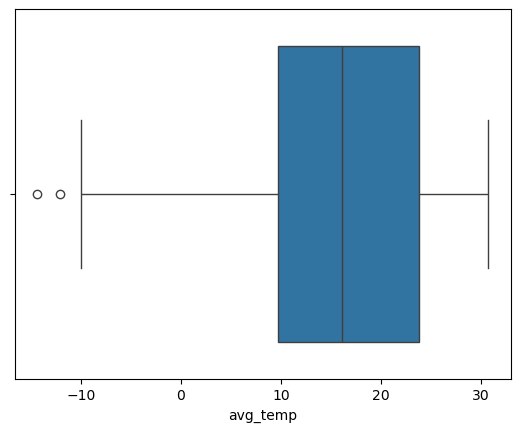

In [361]:
# checking outliers
sns.boxplot(x='avg_temp',data=temp)
plt.show()

In [362]:
q1=temp['avg_temp'].quantile(0.25)
q3=temp['avg_temp'].quantile(0.75)
IQR=q3-q1
lower_limit=q1-1.5*IQR
upper_limit=q3+1.5*IQR

print('Lower limit is :',lower_limit)
print('Upper limit is :',upper_limit)


Lower limit is : -11.268750000000004
Upper limit is : 44.78125000000001


In [363]:
temp.loc[temp['avg_temp']<lower_limit]

,year,country,avg_temp
4416,1815,Kazakhstan,-12.13
47806,1815,Russia,-14.35


In [364]:
#avg_temp feature has null values ,they  are replaced with median

median=temp['avg_temp'].median()
temp['avg_temp']=temp['avg_temp'].fillna(median)

#### 4.Yield data preprocessing

In [366]:
# loading dataset
yields=pd.read_csv('yield.csv')
yields

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
0,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1961,1961,hg/ha,14000
1,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1962,1962,hg/ha,14000
2,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1963,1963,hg/ha,14260
3,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1964,1964,hg/ha,14257
4,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1965,1965,hg/ha,14400
...,...,...,...,...,...,...,...,...,...,...,...,...
56712,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2012,2012,hg/ha,24420
56713,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2013,2013,hg/ha,22888
56714,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2014,2014,hg/ha,21357
56715,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2015,2015,hg/ha,19826


In [367]:
# Dropping unnecessary features
yields.columns

Index(['Domain Code', 'Domain', 'Area Code', 'Area', 'Element Code', 'Element',
       'Item Code', 'Item', 'Year Code', 'Year', 'Unit', 'Value'],
      dtype='object')

In [368]:

yields.drop(columns=['Domain Code','Domain','Area Code','Element Code','Item Code','Year Code','Unit','Element'],inplace=True)
yields

,Area,Item,Year,Value
0,Afghanistan,Maize,1961,14000
1,Afghanistan,Maize,1962,14000
2,Afghanistan,Maize,1963,14260
3,Afghanistan,Maize,1964,14257
4,Afghanistan,Maize,1965,14400
...,...,...,...,...
56712,Zimbabwe,Wheat,2012,24420
56713,Zimbabwe,Wheat,2013,22888
56714,Zimbabwe,Wheat,2014,21357
56715,Zimbabwe,Wheat,2015,19826


# Merging all the datasets

As we have different datsets ,they need to be clubbed together for a better picture

In [370]:
# Merging datasets of pesticides usage,rainfall,temperature and yield together
rainfall.rename(columns={' Area':'Area'},inplace=True) 
temp.rename(columns={'country':'Area','year':'Year'},inplace=True)
yields_final=pd.merge(temp,rainfall,on=['Year','Area'])
yields_final

,Year,Area,avg_temp,average_rain_fall_mm_per_year
0,1985,United Arab Emirates,26.63,78
1,1986,United Arab Emirates,26.70,78
2,1987,United Arab Emirates,26.91,78
3,1989,United Arab Emirates,26.38,78
4,1990,United Arab Emirates,27.11,78
...,...,...,...,...
8797,2009,Mexico,21.76,758
8798,2010,Mexico,20.90,758
8799,2011,Mexico,21.55,758
8800,2012,Mexico,21.52,758


In [371]:
yields_final=pd.merge(yields_final,yields,on=['Area','Year'])

In [372]:
yields_final=pd.merge(yields_final,pesticides,on=['Area','Year'])

In [373]:
# Merged dataset
yields_final

,Year,Area,avg_temp,average_rain_fall_mm_per_year,Item,Value,Value_in_tonnes
0,1990,Ghana,26.73,1187,Cassava,84170,65.80
1,1990,Ghana,26.73,1187,Maize,11889,65.80
2,1990,Ghana,26.73,1187,Plantains and others,61890,65.80
3,1990,Ghana,26.73,1187,"Rice, paddy",16510,65.80
4,1990,Ghana,26.73,1187,Sorghum,6310,65.80
...,...,...,...,...,...,...,...
28243,2013,Mexico,22.19,758,"Rice, paddy",54252,59920.18
28244,2013,Mexico,22.19,758,Sorghum,37350,59920.18
28245,2013,Mexico,22.19,758,Soybeans,15198,59920.18
28246,2013,Mexico,22.19,758,Sweet potatoes,183965,59920.18


In [374]:
yields_final['Item'].unique()

array(['Cassava', 'Maize', 'Plantains and others', 'Rice, paddy',
       'Sorghum', 'Yams', 'Sweet potatoes', 'Potatoes', 'Soybeans',
       'Wheat'], dtype=object)

In [375]:
yields_final.rename(columns={'Value':'yield_hg/ha'},inplace=True)

In [376]:
# basic checks
yields_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28248 entries, 0 to 28247
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Year                           28248 non-null  int64  
 1   Area                           28248 non-null  object 
 2   avg_temp                       28248 non-null  float64
 3   average_rain_fall_mm_per_year  28248 non-null  int32  
 4   Item                           28248 non-null  object 
 5   yield_hg/ha                    28248 non-null  int64  
 6   Value_in_tonnes                28248 non-null  float64
dtypes: float64(2), int32(1), int64(2), object(2)
memory usage: 1.4+ MB


In [377]:
yields_final.describe()

,Year,avg_temp,average_rain_fall_mm_per_year,yield_hg/ha,Value_in_tonnes
count,28248.000000,28248.000000,28248.000000,28248.000000,28248.000000
mean,2001.541950,20.543722,1148.977167,77047.863282,37069.136973
std,7.052997,6.311828,709.757358,84950.194454,59954.787836
min,1990.000000,1.300000,51.000000,50.000000,0.040000
25%,1995.000000,16.710000,593.000000,19918.750000,1695.710000
50%,2001.000000,21.510000,1083.000000,38295.000000,17517.760000
75%,2008.000000,26.000000,1668.000000,104598.250000,48687.880000
max,2013.000000,30.650000,3240.000000,501412.000000,367778.000000


# EDA

#### 1.Univariate analysis

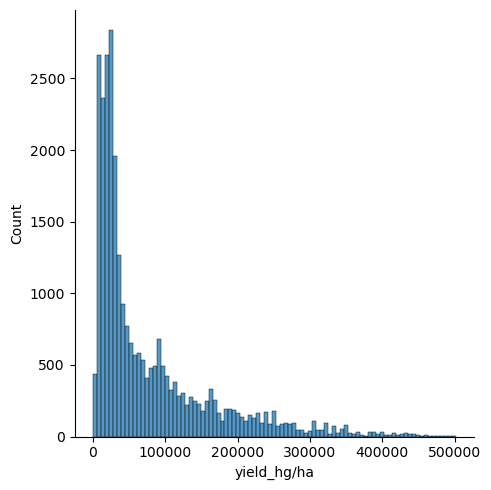

In [380]:
# yield
sns.displot(x='yield_hg/ha',data=yields_final)
plt.show()

<Figure size 1500x1500 with 0 Axes>

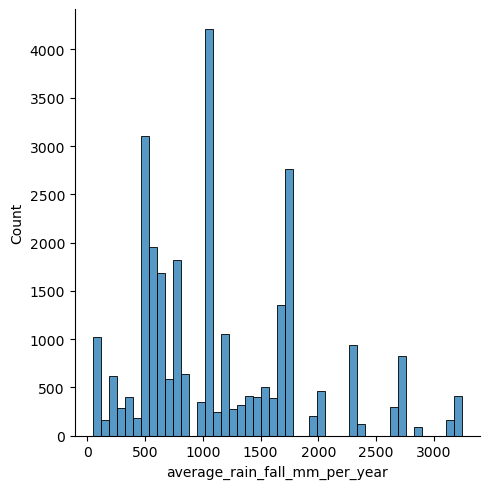

In [381]:
# checking trend of rainfall
plt.figure(figsize=(15
                    ,15))
sns.displot(x='average_rain_fall_mm_per_year',data=yields_final)
plt.show()

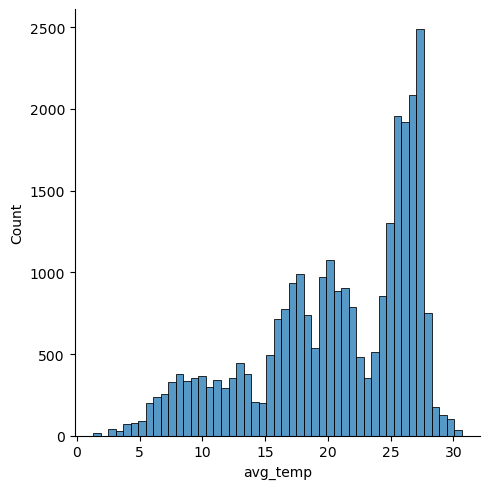

In [382]:
# temperature
sns.displot(x='avg_temp',data=yields_final)
plt.show()

#### 2.Bivariate Analysis

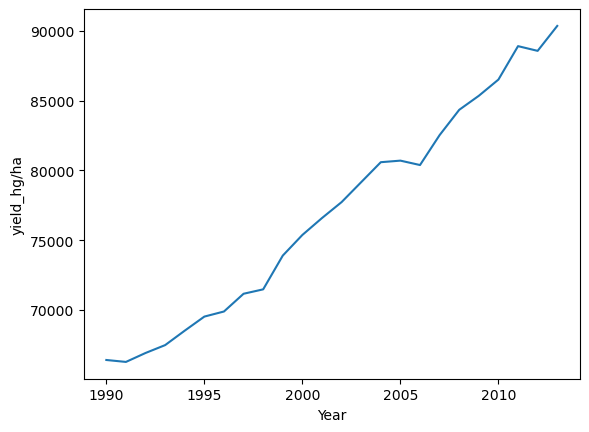

In [384]:
# yearwise yield
sns.lineplot(x='Year',y='yield_hg/ha',data=yields_final,errorbar=None) # errorbar true shows confidence interval
plt.show()


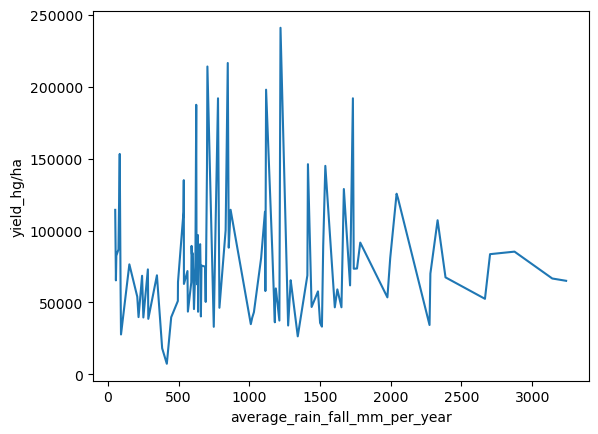

In [385]:
# effect of rainfall on yield
sns.lineplot(x='average_rain_fall_mm_per_year',y='yield_hg/ha',data=yields_final,errorbar=None) # errorbar true shows confidence interval
plt.show()

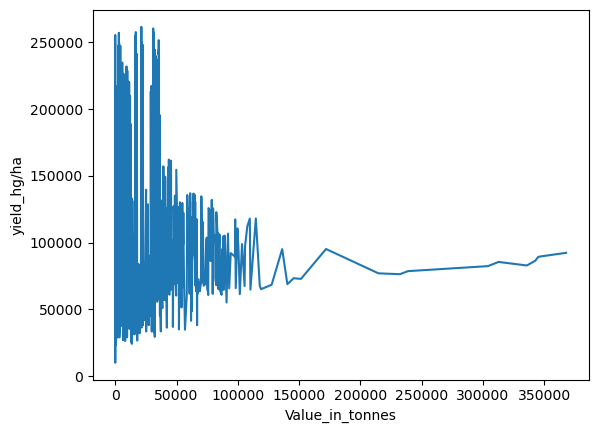

In [386]:
# use of pesticides and effect on yield
sns.lineplot(x='Value_in_tonnes',y='yield_hg/ha',data=yields_final,errorbar=None)
plt.show()

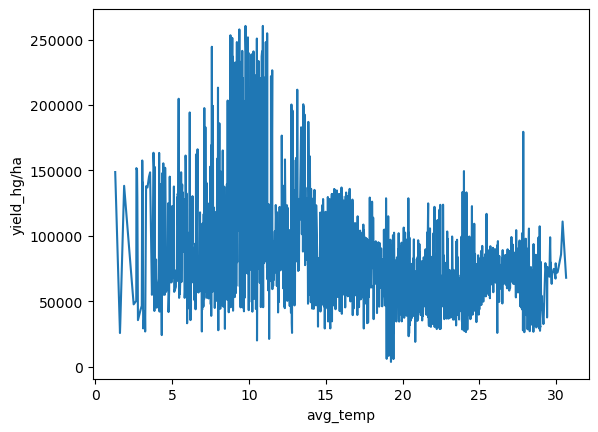

In [387]:
# temperature and yield
sns.lineplot(x='avg_temp',y='yield_hg/ha',data=yields_final,errorbar=None)
plt.show()

# Categorical data encoding

In [389]:
yields_final['Item'],unique_values=pd.factorize(yields_final['Item'])


In [390]:
yields_final.drop(columns=['Area','Year'],inplace=True)

In [391]:
encoded_df=yields_final

In [392]:
encoded_df

,avg_temp,average_rain_fall_mm_per_year,Item,yield_hg/ha,Value_in_tonnes
0,26.73,1187,0,84170,65.80
1,26.73,1187,1,11889,65.80
2,26.73,1187,2,61890,65.80
3,26.73,1187,3,16510,65.80
4,26.73,1187,4,6310,65.80
...,...,...,...,...,...
28243,22.19,758,3,54252,59920.18
28244,22.19,758,4,37350,59920.18
28245,22.19,758,8,15198,59920.18
28246,22.19,758,6,183965,59920.18


# Building Model XG-BOOST

In [394]:
# seperating input features and output feature
X=encoded_df.drop(columns=['yield_hg/ha'])
y=encoded_df['yield_hg/ha']

In [395]:
# train test split,initializing regressor
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
# n_estimators:This parameter specifies the number of boosting stages to be run
# ax_depth: specifies the maximum depth of the individual trees

In [396]:
# training model
gbr.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [397]:
# predictions
y_pred=gbr.predict(X_test)

In [398]:
y_pred

array([ 16330.11874509,  54424.36011583,  34378.52838275, ...,
        15101.87979819,  12003.09469277, 229154.11405248])

In [399]:
# checking accuracy of model
r2=r2_score(y_test,y_pred)
r2

0.8178431677408212

# Model Deployment


In [401]:
import pickle

In [402]:
# Save the model
with open('model.pkl', 'wb') as f:  # 'wb' means write in binary mode
    pickle.dump(gbr, f)

print("Model saved as 'model.pkl'")


Model saved as 'model.pkl'
